# <font color='blue'>Análise de Vendas em E-commerce com Python</font>
## <font color='blue'>Por Afonso Martins</font>

### 🔍 Sobre o Projeto
Análise exploratória de dados de vendas em uma loja de e-commerce utilizando **Python, Pandas, NumPy e Matplotlib**.  
O objetivo é identificar padrões de consumo, produtos mais vendidos e indicadores de desempenho.

### 🧠 Tecnologias
Python • Pandas • NumPy • Matplotlib • Jupyter Notebook / VS Code

### 👨‍💻 Autor
**Afonso Martins**  
💻 [github.com/afonsomartins](https://github.com/afonsomartins)



## 📊 1.1 Problema de Negócio
A loja de e-commerce está em expansão, com um volume crescente de transações diárias. No entanto, o grande volume de dados ainda não é plenamente aproveitado — decisões estratégicas são tomadas com base em percepções e não em evidências concretas. Isso gera alguns desafios:

- 🏬 **Gestão de Estoque Ineficiente:** Falta clareza sobre os produtos mais vendidos e os que têm baixa rotatividade, resultando em excesso de estoque ou falta de itens de alta demanda.
- 🎯 **Marketing Genérico:** As campanhas não são segmentadas por categoria ou região, reduzindo o retorno sobre o investimento.
- 📆 **Perda de Oportunidades Sazonais:** Ausência de análises temporais impede o aproveitamento de períodos de alta ou o estímulo de vendas em períodos de baixa.
- 🌎 **Expansão sem Direção:** A falta de visibilidade regional dificulta decisões sobre logística e novos mercados.

O principal problema é a **ausência de visibilidade analítica sobre a performance do negócio**, o que limita decisões rápidas, precisas e baseadas em dados.

---

## 🎯 1.2 Objetivos do Projeto
Transformar os dados brutos de vendas em **insights acionáveis** que orientem decisões estratégicas. As principais perguntas de negócio a serem respondidas são:

- 💡 **O que vender?** Identificar os produtos de maior e menor desempenho.  
- 🧭 **Onde focar?** Detectar as categorias mais rentáveis e as regiões com maior representatividade.  
- ⏰ **Quando agir?** Compreender a sazonalidade e os períodos de pico de vendas.  
- 🚀 **Para onde expandir?** Mapear o potencial de crescimento regional.

---

## 🧩 1.3 Solução Proposta
Consolidar, limpar e analisar o histórico de vendas utilizando **Python**, **Pandas**, **NumPy** e **Matplotlib**, para construir um **relatório visual e interativo** com os principais indicadores do negócio. O foco é gerar **informações objetivas e acessíveis** para as áreas de gestão, marketing e operações.

---

## 📈 1.4 Resultados Esperados e Benefícios
- 📦 **Otimização de Estoque:** Reduzir custos e perdas, garantindo a disponibilidade de produtos de alta demanda.  
- 📢 **Marketing Direcionado:** Criar campanhas mais segmentadas e eficientes.  
- 📊 **Planejamento Estratégico:** Antecipar tendências e ajustar recursos de forma proativa.  
- 💼 **Cultura Data-Driven:** Sustentar o crescimento com base em dados e indicadores concretos.


## 2. Importação das Bibliotecas para usarmos no projeto


In [21]:

# Manipulação e análise de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Geração de números aleatórios
import random

# Manipulação de datas
from datetime import datetime, timedelta

# Configurações de exibição de gráficos no notebook
%matplotlib inline


In [22]:
%reload_ext watermark
%watermark -a "Afonso Martins"
%watermark -v
%watermark --iversions

Author: Afonso Martins

Python implementation: CPython
Python version       : 3.12.10
IPython version      : 9.6.0

numpy     : 2.3.4
matplotlib: 3.10.7
seaborn   : 0.13.2
pandas    : 2.3.1



## 3. Função Para Geração de Dados Fictícios


In [23]:
# Definição da função para gerar dados fictícios de vendas
def base_dados_ficticios(num_registros = 600):
    
    """
    Gera um DataFrame do Pandas com dados de vendas fictícios.

    """

    # Mensagem inicial indicando a quantidade de registros a serem gerados
    print(f"\nIniciando a geração de {num_registros} registros de vendas...")

    # Dicionário com produtos, suas categorias e preços
    produtos = {
        'Laptop Gamer': {'categoria': 'Eletrônicos', 'preco': 7500.00},
        'Mouse Vertical': {'categoria': 'Acessórios', 'preco': 250.00},
        'Teclado Mecânico': {'categoria': 'Acessórios', 'preco': 550.00},
        'Monitor Ultrawide': {'categoria': 'Eletrônicos', 'preco': 2800.00},
        'Cadeira Gamer': {'categoria': 'Móveis', 'preco': 1200.00},
        'Headset 7.1': {'categoria': 'Acessórios', 'preco': 800.00},
        'Placa de Vídeo': {'categoria': 'Hardware', 'preco': 4500.00},
        'SSD 1TB': {'categoria': 'Hardware', 'preco': 600.00}
    }

    # Cria uma lista apenas com os nomes dos produtos
    lista_produtos = list(produtos.keys())

    # Dicionário com cidades e seus respectivos estados
    cidades_estados = {
        'São Paulo': 'SP', 'Rio de Janeiro': 'RJ', 'Belo Horizonte': 'MG',
        'Porto Alegre': 'RS', 'Salvador': 'BA', 'Curitiba': 'PR', 'Fortaleza': 'CE'
    }

    # Cria uma lista apenas com os nomes das cidades
    lista_cidades = list(cidades_estados.keys())

    # Lista que armazenará os registros de vendas
    dados_vendas = []

    # Define a data inicial dos pedidos
    data_inicial = datetime(2026, 1, 1)

    # Loop para gerar os registros de vendas
    for i in range(num_registros):
        
        # Seleciona aleatoriamente um produto
        produto_nome = random.choice(lista_produtos)

        # Seleciona aleatoriamente uma cidade
        cidade = random.choice(lista_cidades)

        # Gera uma quantidade de produtos vendida entre 1 e 7
        quantidade = np.random.randint(1, 8)

        # Calcula a data do pedido a partir da data inicial
        data_pedido = data_inicial + timedelta(days = int(i/5), hours = random.randint(0, 23))

        # Se o produto for Mouse ou Teclado, aplica desconto aleatório de até 10%
        if produto_nome in ['Mouse Vertical', 'Teclado Mecânico']:
            preco_unitario = produtos[produto_nome]['preco'] * np.random.uniform(0.9, 1.0)
        else:
            preco_unitario = produtos[produto_nome]['preco']

        # Adiciona um registro de venda à lista
        dados_vendas.append({
            'ID_Pedido': 1000 + i,
            'Data_Pedido': data_pedido,
            'Nome_Produto': produto_nome,
            'Categoria': produtos[produto_nome]['categoria'],
            'Preco_Unitario': round(preco_unitario, 2),
            'Quantidade': quantidade,
            'ID_Cliente': np.random.randint(100, 150),
            'Cidade': cidade,
            'Estado': cidades_estados[cidade]
        })
    
    # Mensagem final indicando que a geração terminou
    print("Geração de dados concluída.\n")

    # Retorna os dados no formato de DataFrame
    return pd.DataFrame(dados_vendas)

## 4. Gerar, Carregar e Explorar os Dados


In [24]:
#Gera o DataFrame com dados fictícios de vendas
df_vendas = base_dados_ficticios(600)



Iniciando a geração de 600 registros de vendas...
Geração de dados concluída.



In [25]:
# verificação de quantidade de registros e colunas
df_vendas.shape

(600, 9)

In [26]:
#exibição das 5 primeiras linhas do DataFrame
df_vendas.head()


,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado
0,1000,2026-01-01 01:00:00,Cadeira Gamer,Móveis,1200.00,3,106,Porto Alegre,RS
1,1001,2026-01-01 01:00:00,SSD 1TB,Hardware,600.00,1,146,Salvador,BA
2,1002,2026-01-01 21:00:00,Laptop Gamer,Eletrônicos,7500.00,1,146,Curitiba,PR
3,1003,2026-01-01 12:00:00,Mouse Vertical,Acessórios,235.64,5,114,Fortaleza,CE
4,1004,2026-01-01 02:00:00,SSD 1TB,Hardware,600.00,1,107,São Paulo,SP


In [27]:
#exibir as ultimas 5 linhas do DataFrame
df_vendas.tail()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado
595,1595,2026-04-30 04:00:00,SSD 1TB,Hardware,600.00,6,103,Fortaleza,CE
596,1596,2026-04-30 09:00:00,Mouse Vertical,Acessórios,227.78,6,118,Belo Horizonte,MG
597,1597,2026-04-30 05:00:00,Mouse Vertical,Acessórios,246.64,6,110,São Paulo,SP
598,1598,2026-04-30 02:00:00,SSD 1TB,Hardware,600.00,3,130,Rio de Janeiro,RJ
599,1599,2026-04-30 01:00:00,SSD 1TB,Hardware,600.00,5,147,São Paulo,SP


In [28]:
#exibir informações gerais do DataFrame
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID_Pedido       600 non-null    int64         
 1   Data_Pedido     600 non-null    datetime64[ns]
 2   Nome_Produto    600 non-null    object        
 3   Categoria       600 non-null    object        
 4   Preco_Unitario  600 non-null    float64       
 5   Quantidade      600 non-null    int64         
 6   ID_Cliente      600 non-null    int64         
 7   Cidade          600 non-null    object        
 8   Estado          600 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 42.3+ KB


In [29]:
#resumo estatístico do DataFrame
df_vendas.describe()

,ID_Pedido,Data_Pedido,Preco_Unitario,Quantidade,ID_Cliente
count,600.000000,600,600.000000,600.000000,600.000000
mean,1299.500000,2026-03-01 23:34:30,2307.688217,4.021667,124.146667
min,1000.000000,2026-01-01 01:00:00,226.290000,1.000000,100.000000
25%,1149.750000,2026-01-31 04:00:00,600.000000,2.000000,112.000000
50%,1299.500000,2026-03-01 23:30:00,1200.000000,4.000000,124.000000
75%,1449.250000,2026-03-31 22:45:00,3225.000000,6.000000,137.000000
max,1599.000000,2026-04-30 09:00:00,7500.000000,7.000000,149.000000
std,173.349358,NaN,2438.827804,1.934969,14.160839


In [30]:
# tipos de dados de cada coluna
df_vendas.dtypes

ID_Pedido                  int64
Data_Pedido       datetime64[ns]
Nome_Produto              object
Categoria                 object
Preco_Unitario           float64
Quantidade                 int64
ID_Cliente                 int64
Cidade                    object
Estado                    object
dtype: object

## 5. Limpeza, Pré-Processamento e Engenharia de Atributos

In [31]:
# Se a coluna 'Data_Pedido' não estiver como tipo datetime, precisamos fazer a conversão explícita
# A coluna pode ser usada para análise temporal
df_vendas['Data_Pedido'] = pd.to_datetime(df_vendas['Data_Pedido'])

In [32]:
# Engenharia de atributos
# Criando a coluna 'Faturamento' (preço x quantidade)
df_vendas['Faturamento'] = df_vendas['Preco_Unitario'] * df_vendas['Quantidade']

In [33]:
# Engenharia de atributos
# Usando uma função lambda para criar uma coluna de status de entrega
df_vendas['Status_Entrega'] = df_vendas['Estado'].apply(lambda estado: 'Rápida' if estado in ['SP', 'RJ', 'MG'] else 'Normal')

In [34]:
# Exibe informações gerais sobre o DataFrame (tipos de dados, valores não nulos)
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID_Pedido       600 non-null    int64         
 1   Data_Pedido     600 non-null    datetime64[ns]
 2   Nome_Produto    600 non-null    object        
 3   Categoria       600 non-null    object        
 4   Preco_Unitario  600 non-null    float64       
 5   Quantidade      600 non-null    int64         
 6   ID_Cliente      600 non-null    int64         
 7   Cidade          600 non-null    object        
 8   Estado          600 non-null    object        
 9   Faturamento     600 non-null    float64       
 10  Status_Entrega  600 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 51.7+ KB


In [35]:
# Exibe as 5 primeiras linhas novamente para ver as novas colunas
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado,Faturamento,Status_Entrega
0,1000,2026-01-01 01:00:00,Cadeira Gamer,Móveis,1200.00,3,106,Porto Alegre,RS,3600.0,Normal
1,1001,2026-01-01 01:00:00,SSD 1TB,Hardware,600.00,1,146,Salvador,BA,600.0,Normal
2,1002,2026-01-01 21:00:00,Laptop Gamer,Eletrônicos,7500.00,1,146,Curitiba,PR,7500.0,Normal
3,1003,2026-01-01 12:00:00,Mouse Vertical,Acessórios,235.64,5,114,Fortaleza,CE,1178.2,Normal
4,1004,2026-01-01 02:00:00,SSD 1TB,Hardware,600.00,1,107,São Paulo,SP,600.0,Rápida


## 6. Análise 1 - Top 10 Produtos Mais Vendidos
<!-- Trabalho Desenvolvido no Curso da Data Science Academy - www.datascienceacademy.com.br -->
Quais os top 10 produtos mais vendidos?

In [36]:
# os 10 produtos mais vendidos
top_10_produtos = df_vendas.groupby('Nome_Produto')['Quantidade'].sum().sort_values(ascending=False).head(10)
top_10_produtos

Nome_Produto
Monitor Ultrawide    338
Cadeira Gamer        323
Laptop Gamer         311
Mouse Vertical       306
Headset 7.1          296
Teclado Mecânico     284
SSD 1TB              282
Placa de Vídeo       273
Name: Quantidade, dtype: int64

C:\Users\u11739\AppData\Local\Temp\ipykernel_16292\2814104353.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_produtos.values, y=top_10_produtos.index, palette="viridis")


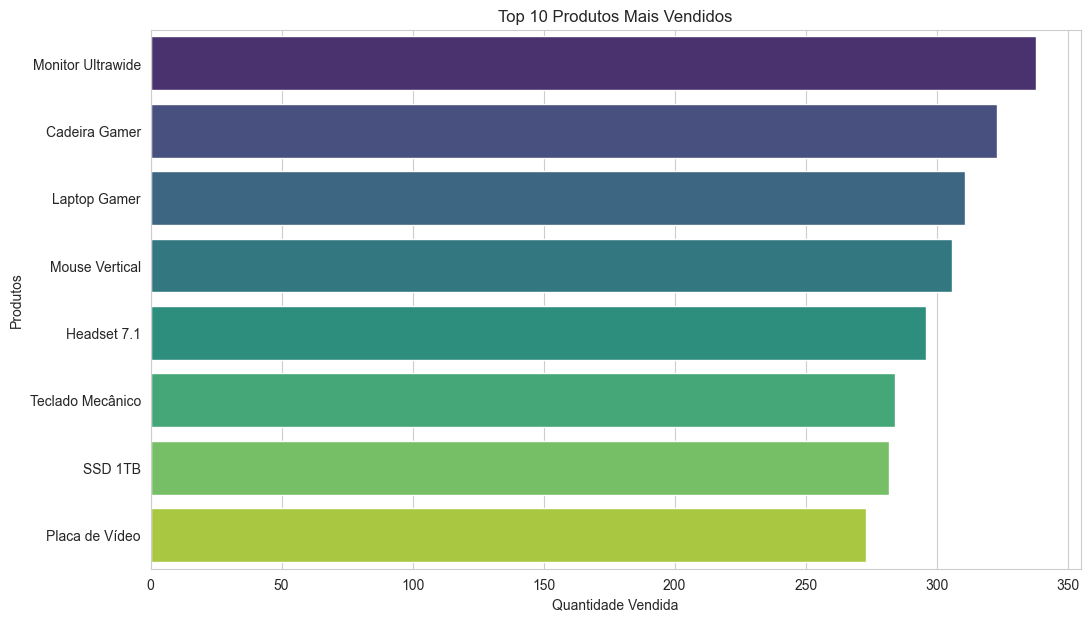

In [37]:
# Definindo o estilo dos gráficos
sns.set_style("whitegrid")
# criando um gráfico de barras para os 10 produtos mais vendidos
plt.figure(figsize=(12,7))
# criando o gráfico de barras horizontal
sns.barplot(x=top_10_produtos.values, y=top_10_produtos.index, palette="viridis")
plt.xlabel("Quantidade Vendida")
plt.ylabel("Produtos")
plt.title("Top 10 Produtos Mais Vendidos")  
plt.show()

## 7. Análise 2 - Faturamento Mensal

Qual foi o faturamento mensal?

In [39]:
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado,Faturamento,Status_Entrega
0,1000,2026-01-01 01:00:00,Cadeira Gamer,Móveis,1200.00,3,106,Porto Alegre,RS,3600.0,Normal
1,1001,2026-01-01 01:00:00,SSD 1TB,Hardware,600.00,1,146,Salvador,BA,600.0,Normal
2,1002,2026-01-01 21:00:00,Laptop Gamer,Eletrônicos,7500.00,1,146,Curitiba,PR,7500.0,Normal
3,1003,2026-01-01 12:00:00,Mouse Vertical,Acessórios,235.64,5,114,Fortaleza,CE,1178.2,Normal
4,1004,2026-01-01 02:00:00,SSD 1TB,Hardware,600.00,1,107,São Paulo,SP,600.0,Rápida


In [43]:

# Faturamento Mensal
# Extraindo o mês e o ano da coluna 'Data_Pedido'
df_vendas['Ano'] = df_vendas['Data_Pedido'].dt.year
df_vendas['Mês'] = df_vendas['Data_Pedido'].dt.month

# Calculando o faturamento mensal
faturamento_mensal = df_vendas.groupby(['Ano', 'Mês'])['Faturamento'].sum().reset_index()
#formatação da coluna de faturamento para moeda apenas para melhor visualização
faturamento_mensal['Faturamento'] = faturamento_mensal['Faturamento'].apply(lambda x: f'R$ {x:,.2f}')
faturamento_mensal


,Ano,Mês,Faturamento
0,2026,1,"R$ 1,247,766.92"
1,2026,2,"R$ 1,394,366.48"
2,2026,3,"R$ 1,408,176.54"
3,2026,4,"R$ 1,472,689.89"


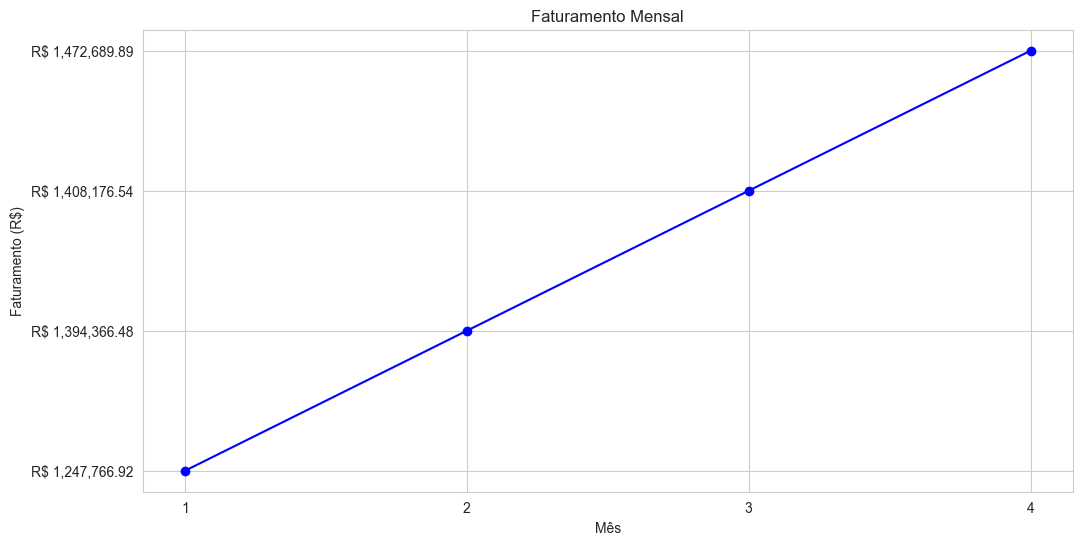

In [53]:
# Grafico de Faturamento Mensal
plt.figure(figsize=(12,6))
# Meses no eixo x e faturamento no eixo y
plt.plot(faturamento_mensal.index, faturamento_mensal['Faturamento'], marker='o',color='b')
# X label com mês formatado
plt.xticks(faturamento_mensal.index, [f"{row['Mês']}" for _, row in faturamento_mensal.iterrows()])
plt.xlabel("Mês")
plt.ylabel("Faturamento (R$)")
plt.title("Faturamento Mensal")
plt.grid(True)
plt.show()


## 8. Análise 3 - Vendas Por Estado

Qual o total de vendas por estado?

In [56]:
# total de faturamento por estado
faturamento_por_estado = df_vendas.groupby('Estado')['Faturamento'].sum().reset_index()
faturamento_por_estado['Faturamento'] = faturamento_por_estado['Faturamento'].apply(lambda x: f'R$ {x:,.2f}')
faturamento_por_estado

,Estado,Faturamento
0,BA,"R$ 649,930.42"
1,CE,"R$ 1,099,254.27"
2,MG,"R$ 984,123.14"
3,PR,"R$ 584,752.19"
4,RJ,"R$ 666,471.69"
5,RS,"R$ 724,742.53"
6,SP,"R$ 813,725.59"


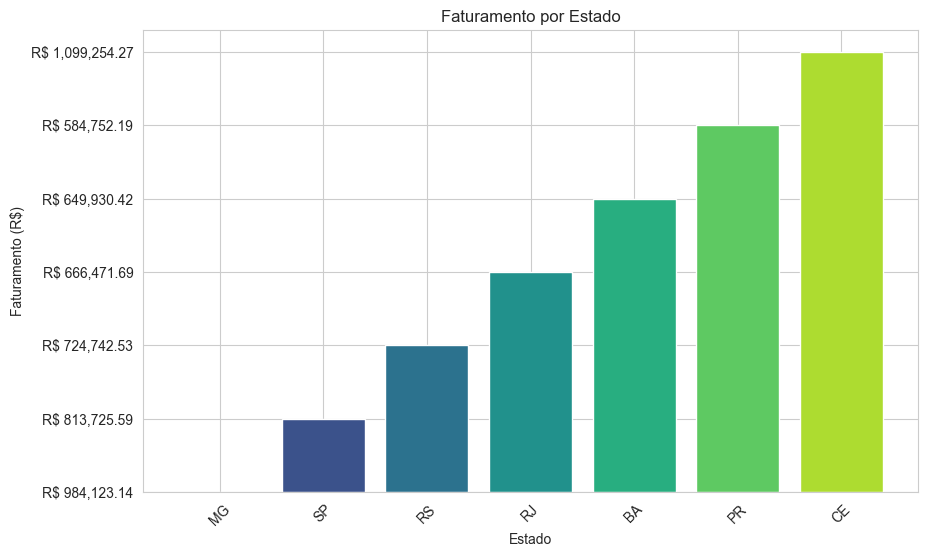

In [67]:
# grafico de faturamento por estado com paleta de cores com vendas crescente de vendas
f_sorted = faturamento_por_estado.sort_values('Faturamento', ascending=False)

plt.figure(figsize=(10,6))
colors = sns.color_palette("viridis", len(f_sorted))
plt.bar(f_sorted['Estado'], f_sorted['Faturamento'], color=colors)
plt.xlabel("Estado")
plt.ylabel("Faturamento (R$)")
plt.title("Faturamento por Estado")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## 9. Análise 4 - Faturamento Por Categoria

Qual o faturamento total por categoria?

In [68]:
# total de faturamento por categoria de produto
faturamento_por_categoria = df_vendas.groupby('Categoria')['Faturamento'].sum().reset_index()
faturamento_por_categoria['Faturamento'] = faturamento_por_categoria['Faturamento'].apply(lambda x: f'R$ {x:,.2f}')
faturamento_por_categoria

,Categoria,Faturamento
0,Acessórios,"R$ 458,799.83"
1,Eletrônicos,"R$ 3,278,900.00"
2,Hardware,"R$ 1,397,700.00"
3,Móveis,"R$ 387,600.00"


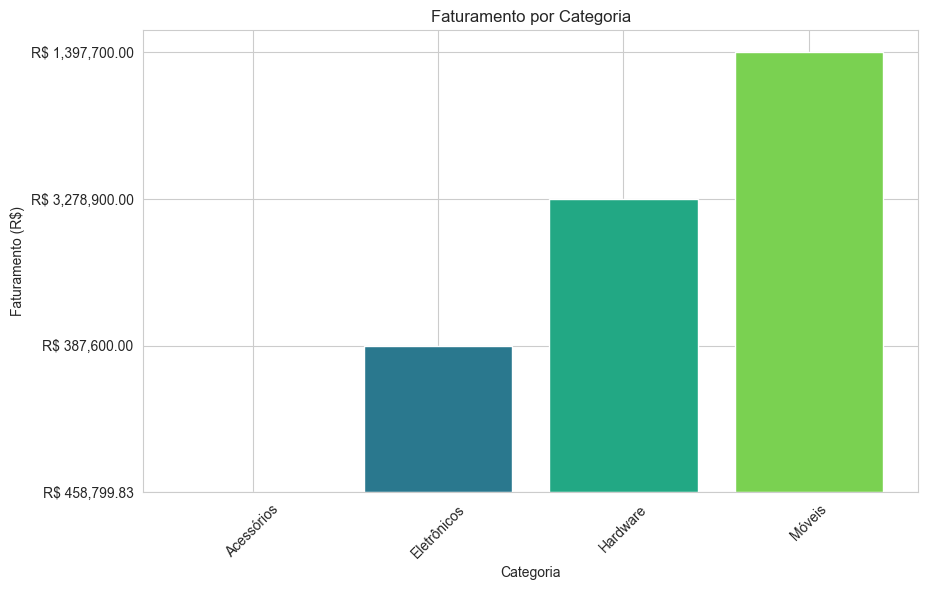

In [73]:
# grafico de faturamento por categoria de produto
plt.figure(figsize=(10,6))
colors = sns.color_palette("viridis", len(faturamento_por_categoria))
plt.bar(faturamento_por_categoria['Categoria'].sort_values(), faturamento_por_categoria['Faturamento'].sort_values(ascending=False), color=colors)
plt.xlabel("Categoria")
plt.ylabel("Faturamento (R$)")
plt.title("Faturamento por Categoria")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()